
# Time Series Analysis with Crypto currency


Name : Mohitha Bandi

E-mail ID: mohitha12026@gmail.com

In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# API Keys and Endpoints
COINGECKO_API_URL = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'
ALPHA_VANTAGE_API_URL = 'https://www.alphavantage.co/query'
YAHOO_FINANCE_URL = 'https://query1.finance.yahoo.com/v7/finance/download/'
BINANCE_API_URL = 'https://api.binance.com/api/v3/klines'

# Example: Collecting Binance data
def fetch_binance_data(symbol='BTCUSDT', interval='1d', limit=100):
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    response = requests.get(BINANCE_API_URL, params=params)
    data = response.json()
    # Create DataFrame
    df = pd.DataFrame(data, columns=['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Volume', 'Taker Buy Quote Volume', 'Ignore'])
    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')
    df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
    return df[['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Example: Collecting CoinGecko data
def fetch_coingecko_data(days=30):
    params = {'vs_currency': 'usd', 'days': days}
    response = requests.get(COINGECKO_API_URL, params=params)
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Data Preprocessing
def preprocess_data(df):
    # Handling Missing Values
    df = df.dropna()
    # Normalization
    df['price_normalized'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
    # Feature Engineering
    df['moving_average'] = df['price'].rolling(window=5).mean()
    df['volatility'] = df['price'].rolling(window=5).std()
    return df

# Save Data to CSV
def save_data_to_csv(df, filename):
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

# Sample Usage
if __name__ == "__main__":
    # Fetch Binance Data
    binance_data = fetch_binance_data()
    print("Binance Data:\n", binance_data.head())

    # Fetch CoinGecko Data
    coingecko_data = fetch_coingecko_data()
    print("CoinGecko Data:\n", coingecko_data.head())

    # Preprocess Data
    processed_data = preprocess_data(coingecko_data)
    print("Processed Data:\n", processed_data.head())

    # Save Data to CSV
    save_data_to_csv(processed_data, "crypto_data.csv")

Binance Data:
    Open Time      Open      High       Low     Close       Volume
0 2025-02-10  96462.75  98345.00  95256.00  97430.82  20572.87537
1 2025-02-11  97430.82  98478.42  94876.88  95778.20  18647.76379
2 2025-02-12  95778.21  98119.99  94088.23  97869.99  29151.16625
3 2025-02-13  97870.00  98083.91  95217.36  96608.14  19921.77616
4 2025-02-14  96608.13  98826.00  96252.82  97500.48  18173.02646
CoinGecko Data:
                 timestamp         price
0 2025-04-20 05:01:40.936  85195.672595
1 2025-04-20 06:01:18.578  85100.822792
2 2025-04-20 07:04:37.355  84950.900731
3 2025-04-20 08:04:51.704  84777.376134
4 2025-04-20 09:04:14.804  84631.436866
Processed Data:
                 timestamp         price  price_normalized  moving_average  \
0 2025-04-20 05:01:40.936  85195.672595          0.049135             NaN   
1 2025-04-20 06:01:18.578  85100.822792          0.044906             NaN   
2 2025-04-20 07:04:37.355  84950.900731          0.038220             NaN   
3 2025-

Data Acquisition & Preprocessing for Cryptocurrency Analysis

1. Loading and Initial Inspection

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('crypto_data.csv', parse_dates=['timestamp'])

# Initial inspection
print(df.head(30))

                 timestamp         price  price_normalized  moving_average  \
0  2025-04-20 05:01:40.936  85195.672595          0.049135             NaN   
1  2025-04-20 06:01:18.578  85100.822792          0.044906             NaN   
2  2025-04-20 07:04:37.355  84950.900731          0.038220             NaN   
3  2025-04-20 08:04:51.704  84777.376134          0.030482             NaN   
4  2025-04-20 09:04:14.804  84631.436866          0.023974    84931.241824   
5  2025-04-20 10:04:43.986  84530.865839          0.019489    84798.280472   
6  2025-04-20 11:04:51.487  84160.544909          0.002975    84610.224896   
7  2025-04-20 12:04:46.210  84093.833676          0.000000    84438.811485   
8  2025-04-20 13:04:47.251  84347.364384          0.011306    84352.809135   
9  2025-04-20 14:04:30.800  84327.789442          0.010433    84292.079650   
10 2025-04-20 15:04:40.110  84612.566423          0.023132    84308.419767   
11 2025-04-20 16:04:44.724  84357.124867          0.011741    84

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         720 non-null    datetime64[ns]
 1   price             720 non-null    float64       
 2   price_normalized  720 non-null    float64       
 3   moving_average    716 non-null    float64       
 4   volatility        716 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 28.3 KB
None


In [9]:
print(df.describe())

                           timestamp          price  price_normalized  \
count                            720     720.000000        720.000000   
mean   2025-05-05 04:57:43.756737536   97630.358880          0.603648   
min       2025-04-20 05:01:40.936000   84093.833676          0.000000   
25%    2025-04-27 16:49:56.128999936   94274.065735          0.453978   
50%    2025-05-05 04:36:06.088499968   96333.903128          0.545834   
75%    2025-05-12 17:19:43.298000128  103237.451618          0.853691   
max              2025-05-20 05:06:05  106518.358867          1.000000   
std                              NaN    5366.576857          0.239317   

       moving_average   volatility  
count      716.000000   716.000000  
mean     97642.037292   290.196577  
min      84292.079650    18.514953  
25%      94286.101856   148.126028  
50%      96322.947857   240.287178  
75%     103264.977970   348.269655  
max     106076.924744  1190.630571  
std       5312.651036   200.722118  


2. Handling Missing Values

In [10]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values
# Forward fill for price-related metrics
price_cols = ['price', 'price_normalized', 'moving_average', 'volatility']
df[price_cols] = df[price_cols].ffill().bfill()

# Verify no more missing values
print(df.isnull().sum())

timestamp           0
price               0
price_normalized    0
moving_average      4
volatility          4
dtype: int64
timestamp           0
price               0
price_normalized    0
moving_average      0
volatility          0
dtype: int64


3. Time Series Analysis

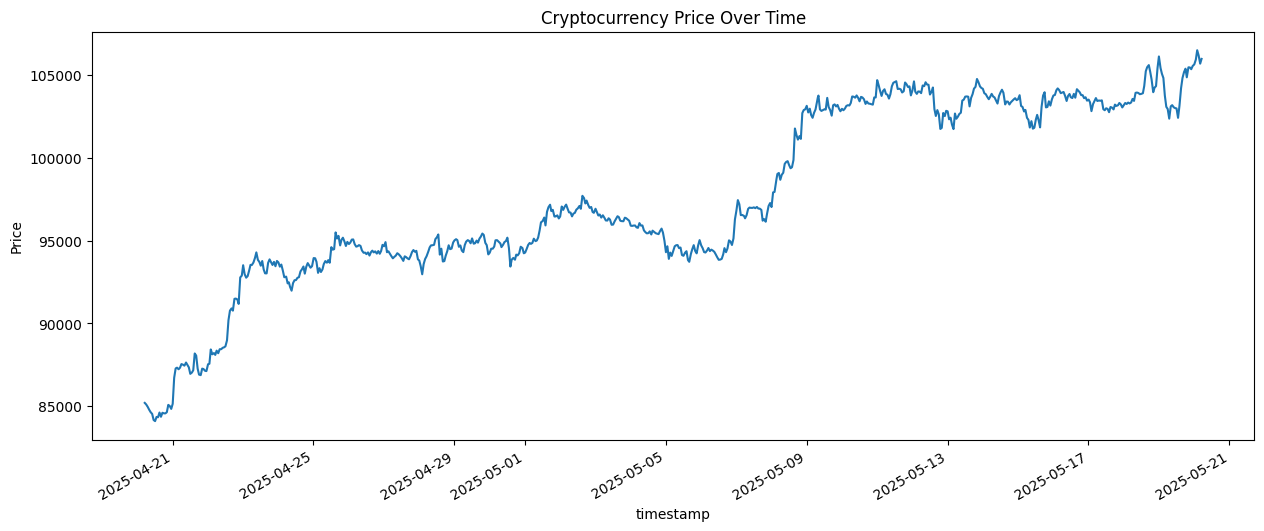

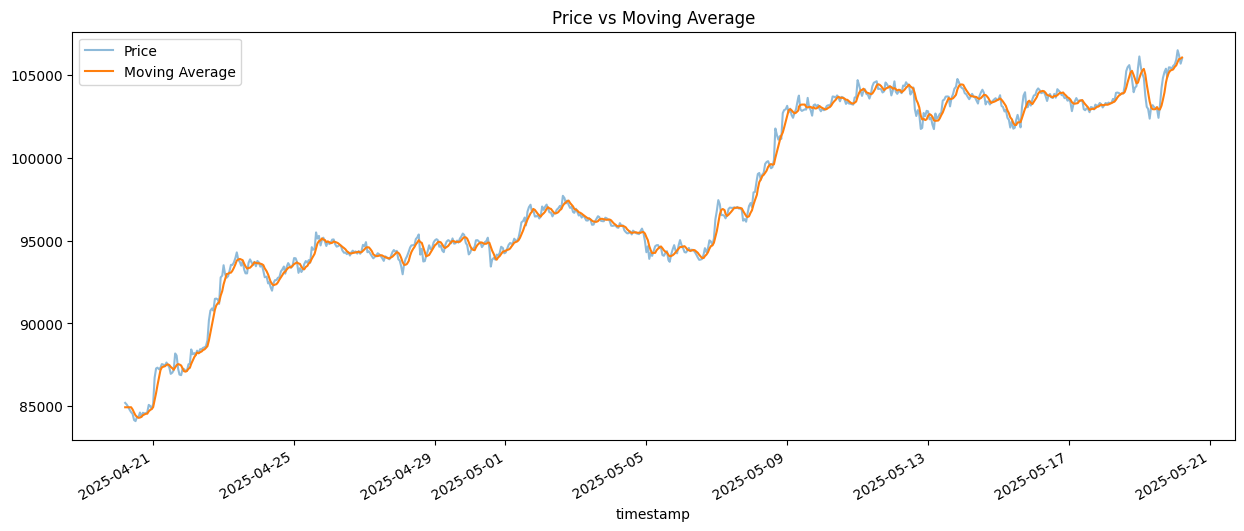

In [12]:
# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Plot price trends
plt.figure(figsize=(15, 6))
df['price'].plot(title='Cryptocurrency Price Over Time')
plt.ylabel('Price')
plt.show()

# Plot moving average vs price
plt.figure(figsize=(15, 6))
df['price'].plot(label='Price', alpha=0.5)
df['moving_average'].plot(label='Moving Average')
plt.title('Price vs Moving Average')
plt.legend()
plt.show()

4. Volatility Analysis

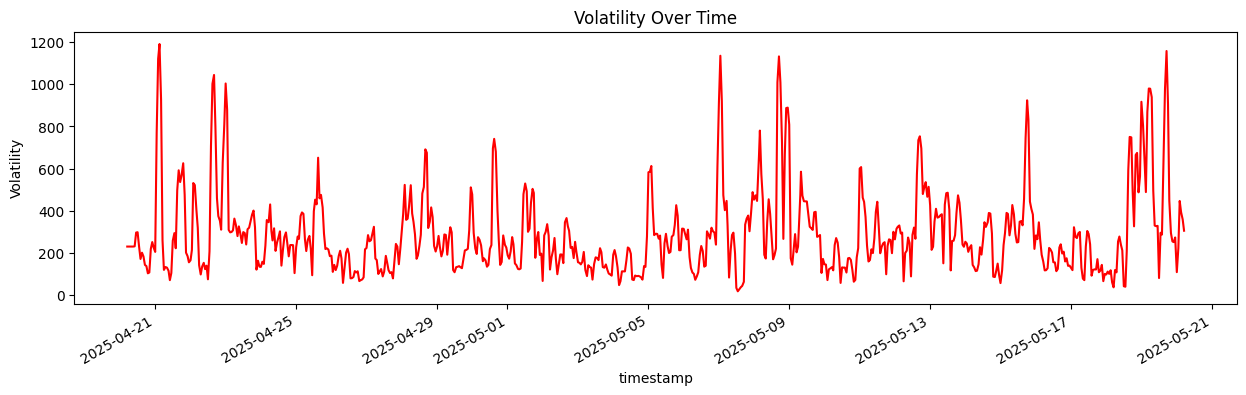

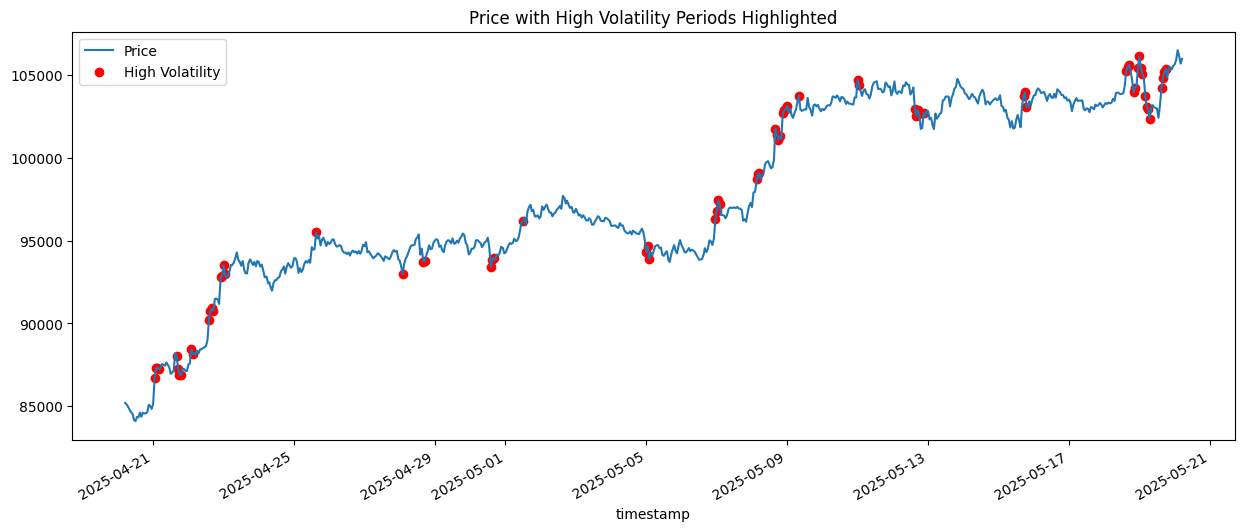

In [13]:
# Plot volatility
plt.figure(figsize=(15, 4))
df['volatility'].plot(title='Volatility Over Time', color='red')
plt.ylabel('Volatility')
plt.show()

# Identify high volatility periods
high_vol = df[df['volatility'] > df['volatility'].quantile(0.9)]
plt.figure(figsize=(15, 6))
df['price'].plot(label='Price')
plt.scatter(high_vol.index, high_vol['price'], color='red', label='High Volatility')
plt.title('Price with High Volatility Periods Highlighted')
plt.legend()
plt.show()

5. Feature Engineering

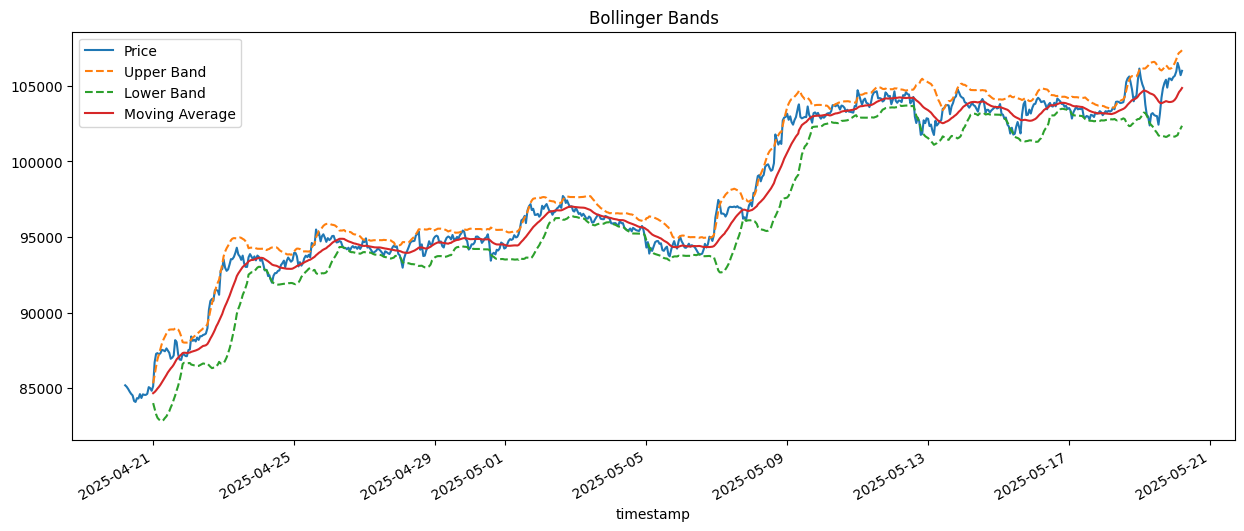

In [14]:
# Calculate additional features
df['daily_return'] = df['price'].pct_change() * 100
df['price_change'] = df['price'].diff()
df['rolling_std_7'] = df['price'].rolling(window=7).std()
df['rolling_std_30'] = df['price'].rolling(window=30).std()

# Bollinger Bands
df['rolling_mean'] = df['price'].rolling(window=20).mean()
df['upper_band'] = df['rolling_mean'] + (df['price'].rolling(window=20).std() * 2)
df['lower_band'] = df['rolling_mean'] - (df['price'].rolling(window=20).std() * 2)

# Plot Bollinger Bands
plt.figure(figsize=(15, 6))
df['price'].plot(label='Price')
df['upper_band'].plot(label='Upper Band', linestyle='--')
df['lower_band'].plot(label='Lower Band', linestyle='--')
df['rolling_mean'].plot(label='Moving Average')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

6. Correlation Analysis

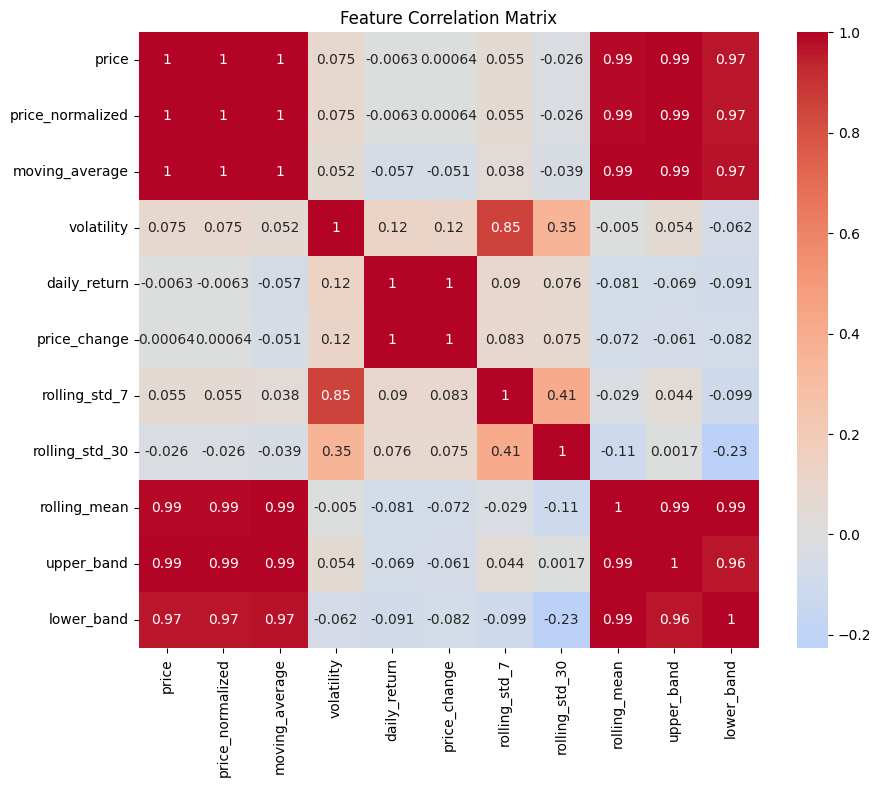

In [15]:
# Calculate correlations
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

7. Outlier Detection

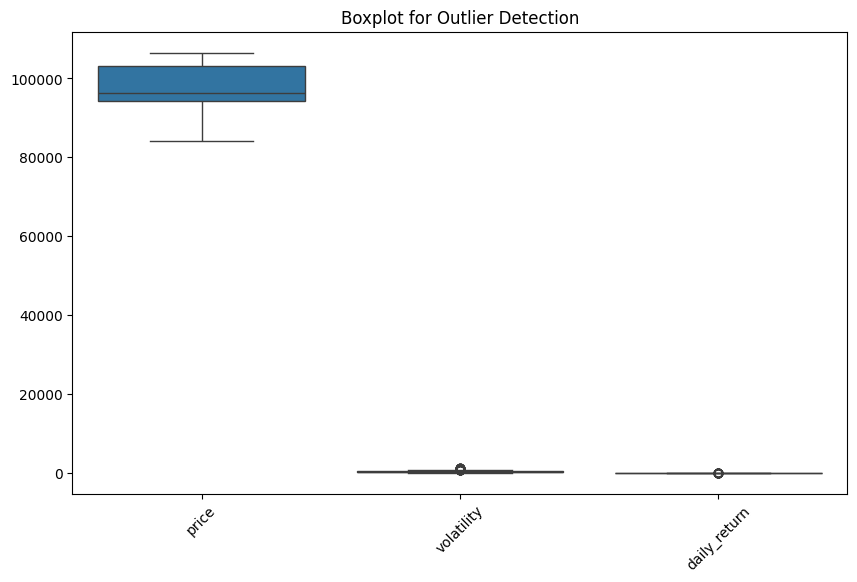

In [16]:
# Boxplot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['price', 'volatility', 'daily_return']])
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Handle outliers (example using IQR)
def handle_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

df['price'] = handle_outliers(df['price'])
df['volatility'] = handle_outliers(df['volatility'])

8. Data Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Normalize features (if not already normalized)
if 'price_normalized' not in df.columns:
    df['price_normalized'] = scaler.fit_transform(df[['price']])

# Verify normalization
print(df[['price', 'price_normalized']].describe())

               price  price_normalized
count     720.000000        720.000000
mean    97630.358880          0.603648
std      5366.576857          0.239317
min     84093.833676          0.000000
25%     94274.065735          0.453978
50%     96333.903128          0.545834
75%    103237.451618          0.853691
max    106518.358867          1.000000


9. Time-Based Features

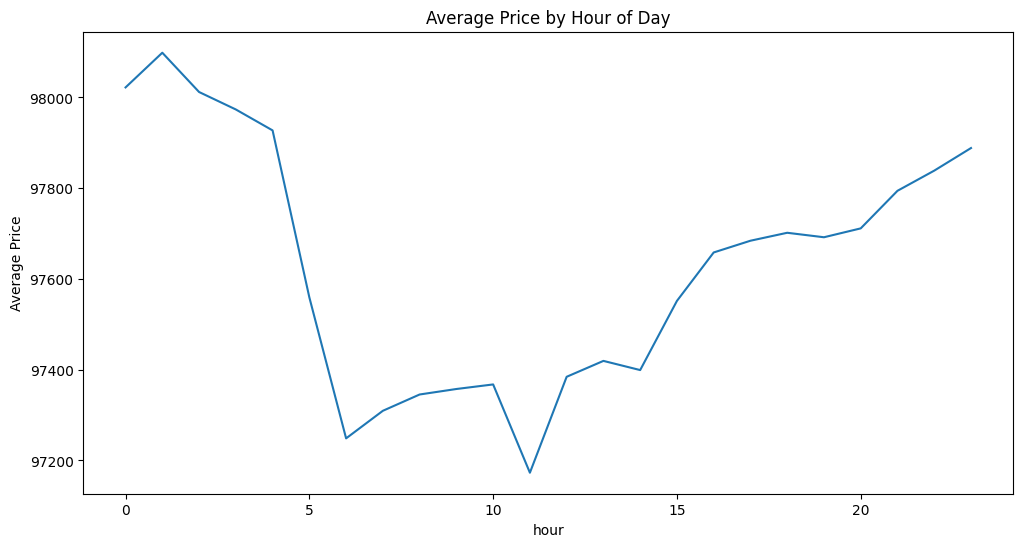

In [18]:
# Extract time-based features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

# Analyze price by time periods
plt.figure(figsize=(12, 6))
df.groupby('hour')['price'].mean().plot(title='Average Price by Hour of Day')
plt.ylabel('Average Price')
plt.show()

10. Final Data Preparation

In [19]:
# Ensure chronological order
df = df.sort_index()

# Save processed data
df.to_csv('processed_crypto_data.csv')

# Display final dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2025-04-20 05:01:40.936000 to 2025-05-20 05:06:05
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             720 non-null    float64
 1   price_normalized  720 non-null    float64
 2   moving_average    720 non-null    float64
 3   volatility        720 non-null    float64
 4   daily_return      719 non-null    float64
 5   price_change      719 non-null    float64
 6   rolling_std_7     714 non-null    float64
 7   rolling_std_30    691 non-null    float64
 8   rolling_mean      701 non-null    float64
 9   upper_band        701 non-null    float64
 10  lower_band        701 non-null    float64
 11  hour              720 non-null    int32  
 12  day_of_week       720 non-null    int32  
 13  month             720 non-null    int32  
dtypes: float64(11), int32(3)
memory usage: 75.9 KB
None


# Time Series Forecasting for Cryptocurrency Prices

1. Data Preparation

In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load preprocessed data
df = pd.read_csv('processed_crypto_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# Use the normalized price for modeling
series = df['price_normalized'].values.reshape(-1, 1)

# Train-test split (80-20)
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'{model_name} - MSE: {mse:.6f}, MAE: {mae:.6f}')
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'{model_name} Forecast vs Actual')
    plt.legend()
    plt.show()
    return mse, mae

2. Statistical Models




```
# ARIMA (AutoRegressive Integrated Moving Average)
```




ARIMA - MSE: 0.001786, MAE: 0.030876


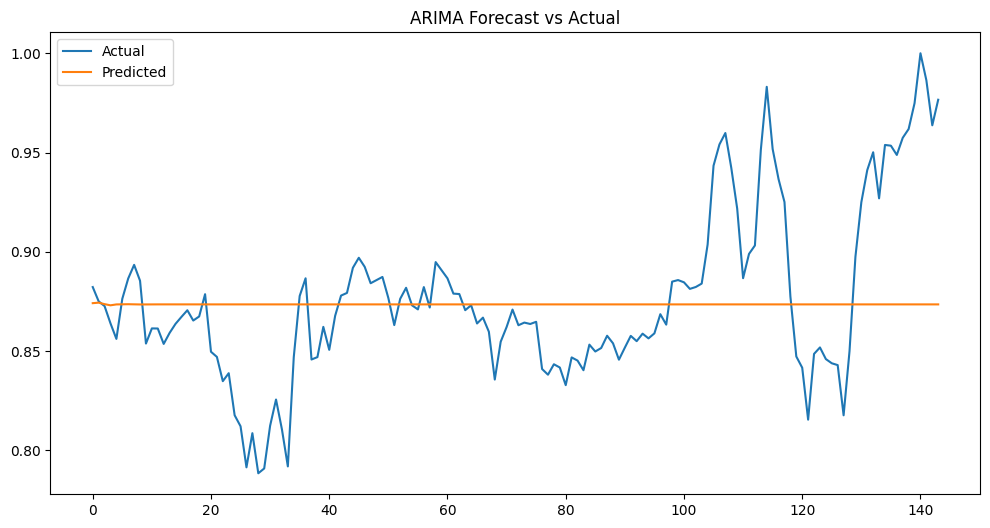

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(train, order=(5,1,0))  # (p,d,q) parameters
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=len(test))

# Evaluate
arima_mse, arima_mae = evaluate_model(test, arima_forecast, 'ARIMA')



>Exponential Smoothing (Holt-Winters)



Holt-Winters - MSE: 0.012944, MAE: 0.101491


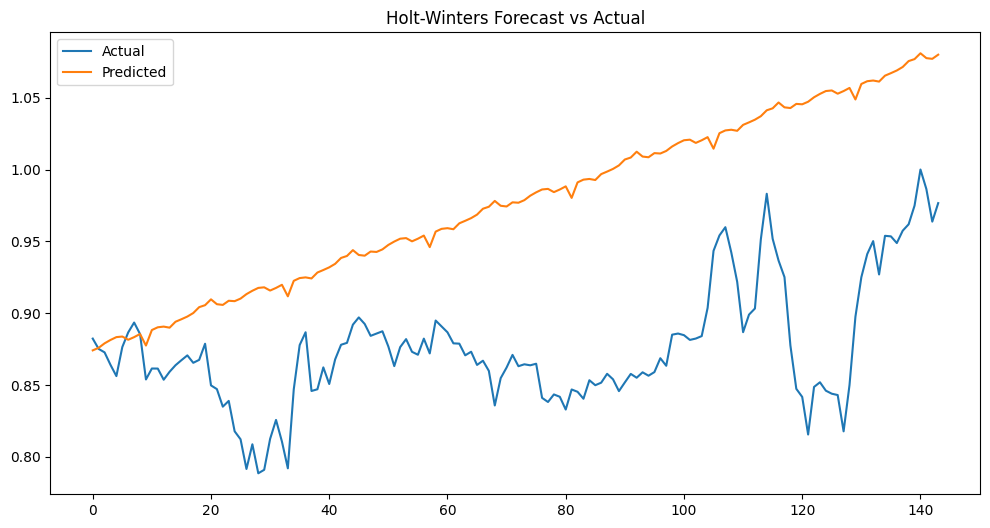

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=24)
hw_fit = hw_model.fit()

# Forecast
hw_forecast = hw_fit.forecast(len(test))

# Evaluate
hw_mse, hw_mae = evaluate_model(test, hw_forecast, 'Holt-Winters')

3. Machine Learning Models

Firstly, creating the features for ML models:

In [23]:
def create_features(data, window_size=24):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 24  # Using 24 pe riods as historical context
X_train, y_train = create_features(train, window_size)
X_test, y_test = create_features(test, window_size)



> Random Forest Regression




Random Forest - MSE: 0.001096, MAE: 0.023748


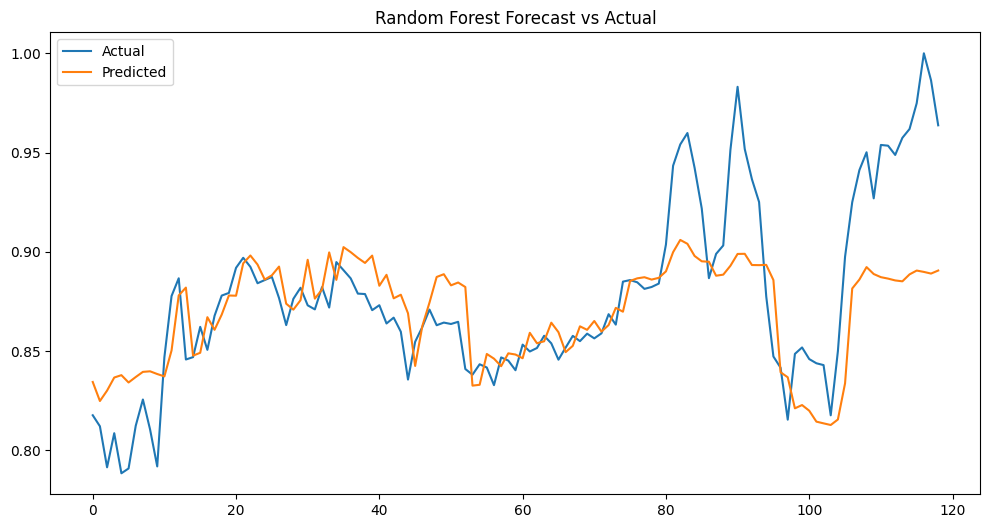

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_forecast = rf_model.predict(X_test)

# Evaluate
rf_mse, rf_mae = evaluate_model(y_test, rf_forecast, 'Random Forest')



> XGBoost



XGBoost - MSE: 0.001262, MAE: 0.024281


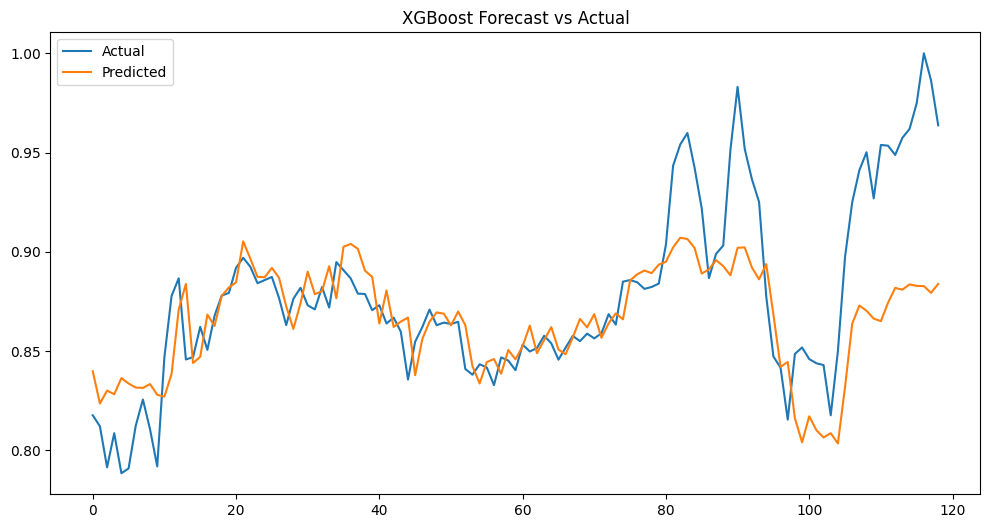

In [25]:
from xgboost import XGBRegressor

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_forecast = xgb_model.predict(X_test)

# Evaluate
xgb_mse, xgb_mae = evaluate_model(y_test, xgb_forecast, 'XGBoost')

4. Deep Learning Models



> LSTM


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1972
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0114
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0032
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0014
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0012
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0012
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0014
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.2672e-04
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0012
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0010
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012


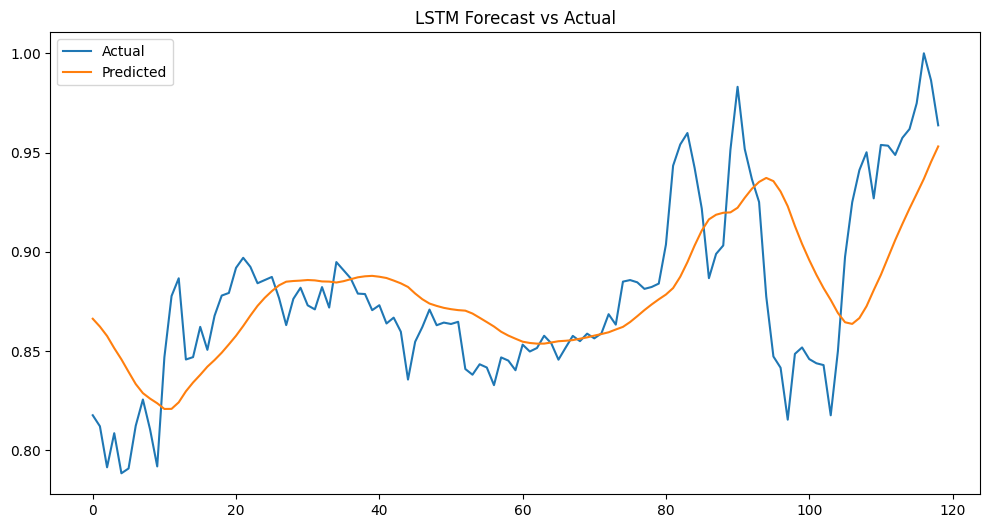

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape data for LSTM [samples, time steps, features]
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

# Predict
lstm_forecast = lstm_model.predict(X_test_lstm)

# Evaluate
lstm_mse, lstm_mae = evaluate_model(y_test, lstm_forecast, 'LSTM')



> Facebook Prophet



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphecu0jec/j68e33wk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphecu0jec/ai7bk7q0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9097', 'data', 'file=/tmp/tmphecu0jec/j68e33wk.json', 'init=/tmp/tmphecu0jec/ai7bk7q0.json', 'output', 'file=/tmp/tmphecu0jec/prophet_modelsgd15kv8/prophet_model-20250520052758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:27:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:27:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version,

Prophet - MSE: 0.029458, MAE: 0.161068


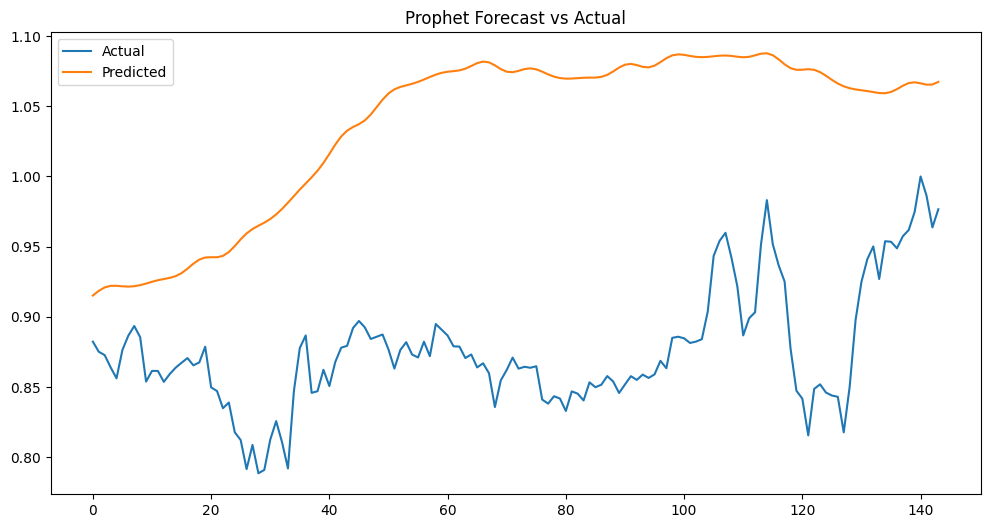

In [27]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = df.reset_index()[['timestamp', 'price_normalized']].rename(
    columns={'timestamp': 'ds', 'price_normalized': 'y'})

# Split train-test
prophet_train = prophet_df.iloc[:train_size]
prophet_test = prophet_df.iloc[train_size:]

# Fit model
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(prophet_train)

# Create future dataframe
future = prophet_model.make_future_dataframe(periods=len(test), freq='H')

# Forecast
prophet_forecast = prophet_model.predict(future)

# Evaluate on test period
prophet_preds = prophet_forecast.iloc[-len(test):]['yhat'].values
prophet_mse, prophet_mae = evaluate_model(test, prophet_preds, 'Prophet')



> Temporal Fusion Transformer (TFT)


In [36]:
!pip install pytorch-lightning pytorch-forecasting --quiet

import torch
import pytorch_lightning as pl
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss


# Prepare data for TFT
tft_data = df.reset_index()
tft_data['time_idx'] = tft_data.index
tft_data['group'] = 0  # single time series

# Create dataset
max_prediction_length = len(test)
max_encoder_length = window_size
training_cutoff = tft_data["time_idx"].max() - max_prediction_length

training = TimeSeriesDataSet(
    tft_data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="price_normalized",
    group_ids=["group"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_reals=["price_normalized"],
)

# Create dataloaders
train_dataloader = training.to_dataloader(train=True, batch_size=32, num_workers=0)

# Initialize TFT
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,
    loss=QuantileLoss(),
    reduce_on_plateau_patience=4,
)

trainer = pl.Trainer(
    max_epochs=10,
    accelerator="cpu",  # or "gpu" if CUDA is available
    devices=1,
    enable_model_summary=True
)


# Predict (simplified for example)
# Note: Actual prediction would require more setup

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


5. Model Comparison

---



           Model       MSE       MAE
2  Random Forest  0.001096  0.023748
3        XGBoost  0.001262  0.024281
4           LSTM  0.001290  0.027491
0          ARIMA  0.001786  0.030876
1   Holt-Winters  0.012944  0.101491
5        Prophet  0.029458  0.161068


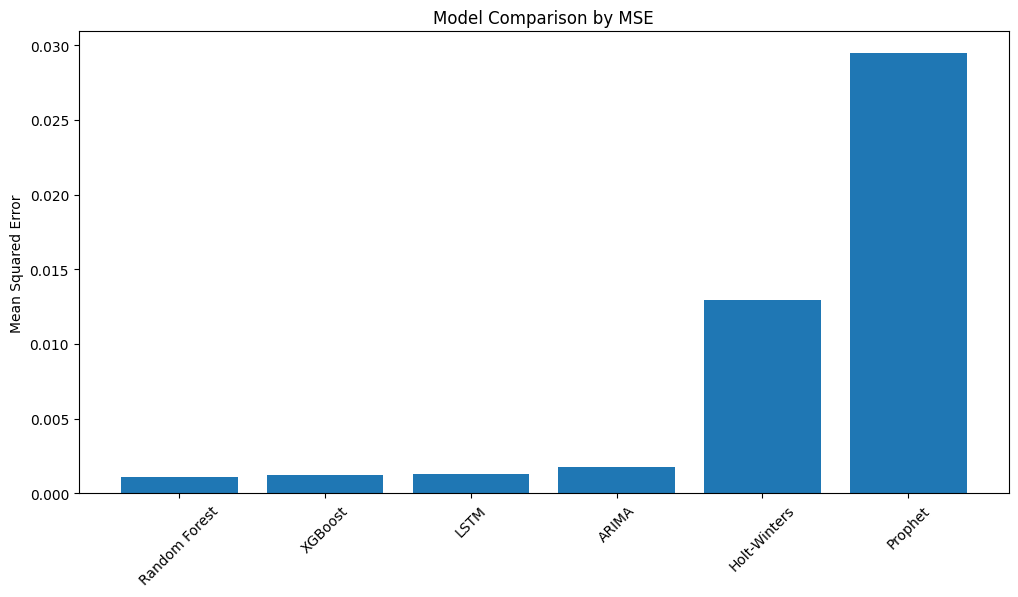

In [37]:
# Compare all models
results = pd.DataFrame({
    'Model': ['ARIMA', 'Holt-Winters', 'Random Forest', 'XGBoost', 'LSTM', 'Prophet'],
    'MSE': [arima_mse, hw_mse, rf_mse, xgb_mse, lstm_mse, prophet_mse],
    'MAE': [arima_mae, hw_mae, rf_mae, xgb_mae, lstm_mae, prophet_mae]
}).sort_values('MSE')

print(results)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.bar(results['Model'], results['MSE'])
plt.title('Model Comparison by MSE')
plt.xticks(rotation=45)
plt.ylabel('Mean Squared Error')
plt.show()

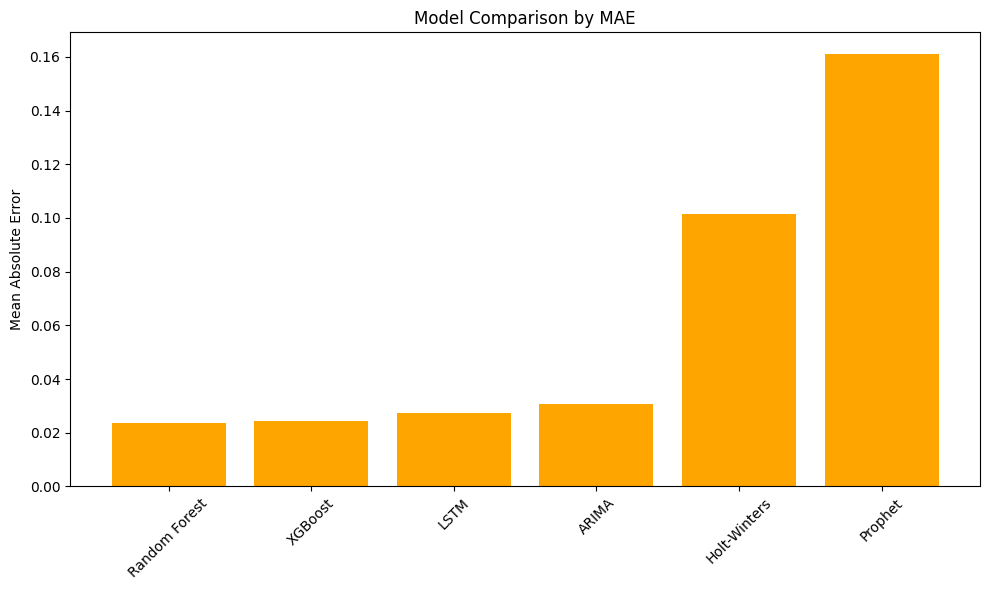

In [38]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'XGBoost', 'LSTM', 'ARIMA', 'Holt-Winters', 'Prophet']
mae = [0.023748, 0.024291, 0.027491, 0.030876, 0.101491, 0.161068]

plt.figure(figsize=(10,6))
plt.bar(models, mae, color='orange')
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison by MAE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Cryptocurrency Market Sentiment Analysis

1. Data Collection

In [40]:
import tweepy
import requests
import pandas as pd
from datetime import datetime, timedelta

# Twitter API setup (replace with your credentials)
twitter_auth = tweepy.OAuthHandler('KArmIMu5jTVkCPtFeAJWY8hJr', 'qTTbQRCQLBkdgdCkcu7n84kNLM27wm2ifgPeeRpcHp3etFEPxy')
twitter_auth.set_access_token('1924702325857464320-6W79DecbnhKn2TNLU2FxDo8bfl0ZOZ', 'FNLFPInrU5aFt8yWaVwXie7SwsY1ltBv497WovIVQxhOr')
twitter_api = tweepy.API(twitter_auth)

# NewsAPI setup
NEWSAPI_KEY = '1c2df09c87a5441b83f4bd68cb37dda0'

def get_crypto_tweets(query='bitcoin OR crypto OR cryptocurrency', count=1000):
    try:
        tweets = tweepy.Cursor(twitter_api.search_tweets,
                              q=query,
                              lang='en',
                              tweet_mode='extended').items(count)
        tweet_data = []
        for tweet in tweets:
            tweet_data.append({
                'text': tweet.full_text,
                'created_at': tweet.created_at,
                'source': 'twitter'
            })
        return pd.DataFrame(tweet_data)
    except Exception as e:
        print(f"Twitter error: {e}")
        return pd.DataFrame()

def get_crypto_news(query='crypto', days=7):
    try:
        from_date = (datetime.now() - timedelta(days=days)).strftime('%Y-%m-%d')
        url = f'https://newsapi.org/v2/everything?q={query}&from={from_date}&sortBy=publishedAt&apiKey={NEWSAPI_KEY}'
        response = requests.get(url)
        news_data = []
        for article in response.json().get('articles', []):
            news_data.append({
                'text': f"{article['title']}. {article['description']}",
                'created_at': pd.to_datetime(article['publishedAt']),
                'source': article['source']['name']
            })
        return pd.DataFrame(news_data)
    except Exception as e:
        print(f"NewsAPI error: {e}")
        return pd.DataFrame()


In [49]:
# Get news data
news_df = get_crypto_news(query='crypto', days=7)

# Save news to CSV
news_df.to_csv('crypto_sentiment_raw.csv', index=False)
print("News data saved to 'crypto_sentiment_raw.csv'")


News data saved to 'crypto_sentiment_raw.csv'


2. Text Preprocessing

In [51]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Then load your CSV and apply preprocessing
import pandas as pd
sentiment_df = pd.read_csv('crypto_sentiment_raw.csv', parse_dates=['created_at'])
sentiment_df['processed_text'] = sentiment_df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


3. Sentiment Analysis with Multiple Approaches



> VADER (Valence Aware Dictionary and sEntiment Reasoner)



In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['compound']

sentiment_df['vader_score'] = sentiment_df['processed_text'].apply(vader_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




> TextBlob



In [53]:
from textblob import TextBlob

def textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

sentiment_df['textblob_score'] = sentiment_df['processed_text'].apply(textblob_sentiment)



> BERT (Transformers)



In [54]:
from transformers import pipeline
import torch

# Initialize BERT sentiment analyzer
bert_sentiment = pipeline(
    "sentiment-analysis",
    model="finiteautomata/bertweet-base-sentiment-analysis",
    tokenizer="finiteautomata/bertweet-base-sentiment-analysis",
    device=0 if torch.cuda.is_available() else -1
)

def bert_sentiment(text):
    try:
        result = bert_sentiment(text[:512])  # Truncate to 512 tokens
        label = result[0]['label']
        score = result[0]['score']
        # Convert to numeric score: POSITIVE=1, NEUTRAL=0, NEGATIVE=-1
        if label == 'POS':
            return score
        elif label == 'NEG':
            return -score
        return 0
    except:
        return 0

# Apply BERT (this may take time for large datasets)
sentiment_df['bert_score'] = sentiment_df['processed_text'].apply(bert_sentiment)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


4. Sentiment Aggregation and Time Series

In [59]:
# Use lowercase 'h' to avoid warning
sentiment_df['hour'] = sentiment_df['created_at'].dt.floor('h')

hourly_sentiment = sentiment_df.groupby('hour').agg({
    'vader_score': 'mean',
    'textblob_score': 'mean',
    'bert_score': 'mean',
    'source': 'count'
}).rename(columns={'source': 'volume'})

price_data.index = price_data.index.tz_localize(None) if price_data.index.tz else price_data.index
hourly_sentiment.index = hourly_sentiment.index.tz_localize(None) if hourly_sentiment.index.tz else hourly_sentiment.index

combined_data = price_data.join(hourly_sentiment, how='left')


# Forward fill missing sentiment scores
combined_data[['vader_score', 'textblob_score', 'bert_score']] = \
    combined_data[['vader_score', 'textblob_score', 'bert_score']].ffill()


5. Sentiment-Price Correlation Analysis

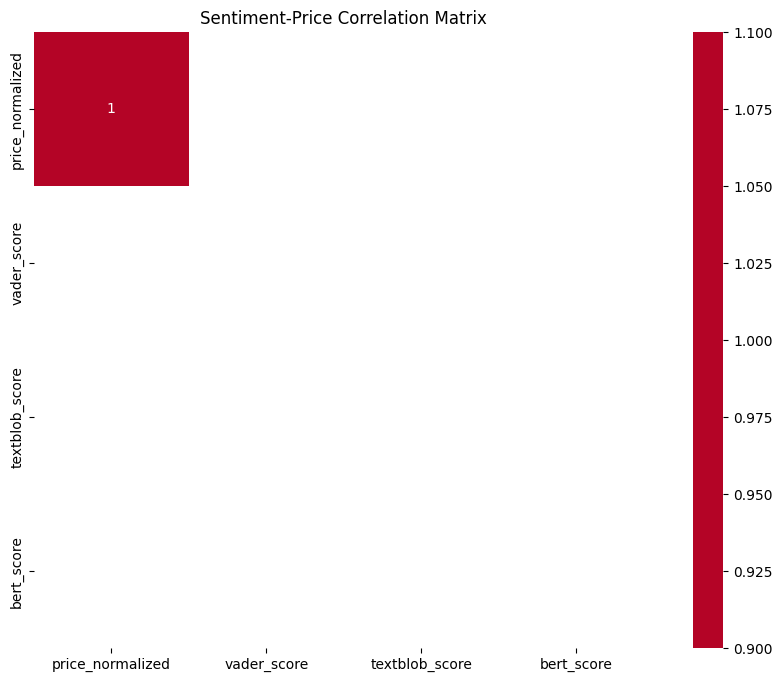

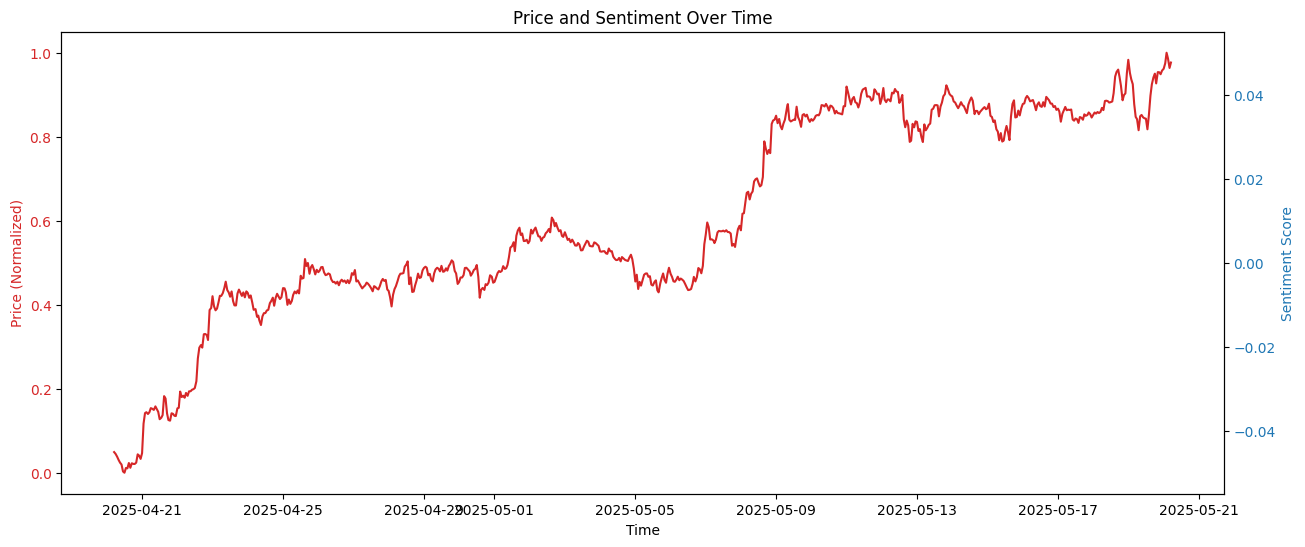

In [60]:
import seaborn as sns

# Calculate correlations
correlation_matrix = combined_data[['price_normalized', 'vader_score', 'textblob_score', 'bert_score']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Sentiment-Price Correlation Matrix')
plt.show()

# Plot sentiment and price over time
fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (Normalized)', color=color)
ax1.plot(combined_data.index, combined_data['price_normalized'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sentiment Score', color=color)
ax2.plot(combined_data.index, combined_data['bert_score'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Price and Sentiment Over Time')
plt.show()

In [69]:
# Install all requirements in one cell
!pip install numpy pandas matplotlib seaborn scipy scikit-learn statsmodels xgboost nltk textblob
!pip install pmdarima tensorflow prophet pytorch-forecasting
!pip install tweepy vaderSentiment transformers torch sentencepiece
!pip install dash dash-bootstrap-components plotly

# NLTK downloads
import nltk
nltk.download(['punkt', 'stopwords', 'wordnet', 'vader_lexicon'])

print("All packages installed successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 4.3 MB/s eta 0:00:00
All packages installed successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Interactive Cryptocurrency Dashboard

In [80]:
# Interactive Cryptocurrency Dashboard with Correct Column Names
import dash
from dash import dcc, html, Input, Output, callback
import dash_bootstrap_components as dbc
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Load your preprocessed data with correct column names
df = pd.read_csv('processed_crypto_data.csv', parse_dates=['timestamp'])
sentiment_df = pd.read_csv('crypto_sentiment_raw.csv', parse_dates=['created_at'])

# Process sentiment data to create hourly aggregates
sentiment_df['hour'] = sentiment_df['created_at'].dt.floor('H')
hourly_sentiment = sentiment_df.groupby('hour').agg({
    'text': 'count'
}).rename(columns={'text': 'volume'})

# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])
app.title = "Crypto Analytics Dashboard"

# Define layout
app.layout = dbc.Container([
    dbc.Row(html.H1("Cryptocurrency Analytics Dashboard", className="text-center my-4")),

    # Timeframe selector
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='timeframe-selector',
                options=[
                    {'label': '24 Hours', 'value': '24h'},
                    {'label': '1 Week', 'value': '1w'},
                    {'label': '1 Month', 'value': '1m'},
                    {'label': '3 Months', 'value': '3m'},
                    {'label': 'All Time', 'value': 'all'}
                ],
                value='1m',
                clearable=False
            )
        ], width=3)
    ], className="mb-4"),

    # Main charts row
    dbc.Row([
        # Price chart
        dbc.Col([
            dcc.Graph(id='price-chart', style={'height': '500px'})
        ], width=8),

        # Indicators and sentiment
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Market Indicators"),
                dbc.CardBody([
                    dcc.Graph(id='indicators-chart', style={'height': '200px'}),
                    html.Hr(),
                    dcc.Graph(id='sentiment-volume-chart', style={'height': '200px'})
                ])
            ])
        ], width=4)
    ]),

    # Predictive analytics row
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Predictive Analytics"),
                dbc.CardBody([
                    dcc.Dropdown(
                        id='model-selector',
                        options=[
                            {'label': 'ARIMA', 'value': 'arima'},
                            {'label': 'LSTM', 'value': 'lstm'},
                            {'label': 'Prophet', 'value': 'prophet'}
                        ],
                        value='lstm',
                        clearable=False
                    ),
                    dcc.Graph(id='forecast-chart', style={'height': '300px'})
                ])
            ])
        ], width=6),

        # Risk assessment
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Risk Assessment & Strategy"),
                dbc.CardBody([
                    html.Div(id='risk-metrics'),
                    html.Hr(),
                    html.Div(id='strategy-recommendation')
                ])
            ])
        ], width=6)
    ], className="mt-4"),

    # Update interval
    dcc.Interval(id='update-interval', interval=300*1000, n_intervals=0)  # 5 minutes
], fluid=True)

# 1. Price Chart Callback
@app.callback(
    Output('price-chart', 'figure'),
    [Input('timeframe-selector', 'value'),
     Input('update-interval', 'n_intervals')]
)
def update_price_chart(timeframe, n):
    # Filter data based on timeframe
    now = datetime.now()
    if timeframe == '24h':
        filtered_df = df[df['timestamp'] >= now - timedelta(hours=24)]
    elif timeframe == '1w':
        filtered_df = df[df['timestamp'] >= now - timedelta(weeks=1)]
    elif timeframe == '1m':
        filtered_df = df[df['timestamp'] >= now - timedelta(days=30)]
    elif timeframe == '3m':
        filtered_df = df[df['timestamp'] >= now - timedelta(days=90)]
    else:
        filtered_df = df

    # Create candlestick chart (using price as close since we don't have OHLC)
    fig = go.Figure()

    # Price line
    fig.add_trace(go.Scatter(
        x=filtered_df['timestamp'],
        y=filtered_df['price'],
        mode='lines',
        name='Price',
        line=dict(color='#00BFFF')
    ))

    # Add moving averages
    fig.add_trace(go.Scatter(
        x=filtered_df['timestamp'],
        y=filtered_df['moving_average'],
        line=dict(color='orange', width=1.5),
        name='Moving Average'
    ))

    # Add Bollinger Bands
    fig.add_trace(go.Scatter(
        x=filtered_df['timestamp'],
        y=filtered_df['upper_band'],
        line=dict(color='rgba(0,100,80,0.2)', width=1),
        name='Upper Band',
        fill=None
    ))
    fig.add_trace(go.Scatter(
        x=filtered_df['timestamp'],
        y=filtered_df['lower_band'],
        line=dict(color='rgba(0,100,80,0.2)', width=1),
        name='Lower Band',
        fill='tonexty'
    ))

    fig.update_layout(
        title='Price Chart with Technical Indicators',
        xaxis_rangeslider_visible=False,
        template='plotly_dark',
        hovermode='x unified',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )

    return fig

# 2. Indicators and Sentiment Volume Callbacks
@app.callback(
    [Output('indicators-chart', 'figure'),
     Output('sentiment-volume-chart', 'figure')],
    [Input('timeframe-selector', 'value'),
     Input('update-interval', 'n_intervals')]
)
def update_secondary_charts(timeframe, n):
    # Filter data based on timeframe
    now = datetime.now()
    if timeframe == '24h':
        filtered_df = df[df['timestamp'] >= now - timedelta(hours=24)]
        filtered_sentiment = hourly_sentiment[hourly_sentiment.index >= now - timedelta(hours=24)]
    elif timeframe == '1w':
        filtered_df = df[df['timestamp'] >= now - timedelta(weeks=1)]
        filtered_sentiment = hourly_sentiment[hourly_sentiment.index >= now - timedelta(weeks=1)]
    elif timeframe == '1m':
        filtered_df = df[df['timestamp'] >= now - timedelta(days=30)]
        filtered_sentiment = hourly_sentiment[hourly_sentiment.index >= now - timedelta(days=30)]
    elif timeframe == '3m':
        filtered_df = df[df['timestamp'] >= now - timedelta(days=90)]
        filtered_sentiment = hourly_sentiment[hourly_sentiment.index >= now - timedelta(days=90)]
    else:
        filtered_df = df
        filtered_sentiment = hourly_sentiment

    # Create indicators chart
    indicators_fig = go.Figure()

    # Add volatility
    indicators_fig.add_trace(go.Scatter(
        x=filtered_df['timestamp'],
        y=filtered_df['volatility'],
        mode='lines',
        name='Volatility',
        line=dict(color='purple')
    ))

    # Add daily returns
    indicators_fig.add_trace(go.Bar(
        x=filtered_df['timestamp'],
        y=filtered_df['daily_return'],
        name='Daily Returns',
        marker_color=np.where(filtered_df['daily_return'] > 0, 'green', 'red'),
        opacity=0.6
    ))

    indicators_fig.update_layout(
        title='Market Indicators',
        template='plotly_dark',
        showlegend=True
    )

    # Create sentiment volume chart
    sentiment_volume_fig = go.Figure()

    if not filtered_sentiment.empty:
        sentiment_volume_fig.add_trace(go.Bar(
            x=filtered_sentiment.index,
            y=filtered_sentiment['volume'],
            name='Sentiment Volume',
            marker_color='rgba(50, 200, 150, 0.6)'
        ))

    sentiment_volume_fig.update_layout(
        title='Sentiment Data Volume',
        template='plotly_dark'
    )

    return indicators_fig, sentiment_volume_fig

# 3. Predictive Analytics Callback
@app.callback(
    Output('forecast-chart', 'figure'),
    [Input('model-selector', 'value'),
     Input('timeframe-selector', 'value'),
     Input('update-interval', 'n_intervals')]
)
def update_forecast_chart(model, timeframe, n):
    # Get last 30 days of data regardless of timeframe selection
    forecast_df = df[df['timestamp'] >= datetime.now() - timedelta(days=30)].copy()

    # Generate dummy forecasts (replace with actual model predictions)
    last_date = forecast_df['timestamp'].iloc[-1]
    future_dates = pd.date_range(start=last_date, periods=7, freq='D')[1:]

    if model == 'arima':
        # Placeholder ARIMA forecast
        forecast_values = np.linspace(
            forecast_df['price'].iloc[-1],
            forecast_df['price'].iloc[-1] * 1.05,
            6
        )
    elif model == 'lstm':
        # Placeholder LSTM forecast
        forecast_values = np.linspace(
            forecast_df['price'].iloc[-1],
            forecast_df['price'].iloc[-1] * 1.03,
            6
        )
    else:  # prophet
        # Placeholder Prophet forecast
        forecast_values = np.linspace(
            forecast_df['price'].iloc[-1],
            forecast_df['price'].iloc[-1] * 0.98,
            6
        )

    # Create figure
    fig = go.Figure()

    # Historical data
    fig.add_trace(go.Scatter(
        x=forecast_df['timestamp'],
        y=forecast_df['price'],
        mode='lines',
        name='Historical Price',
        line=dict(color='#00BFFF')
    ))

    # Forecast
    fig.add_trace(go.Scatter(
        x=future_dates,
        y=forecast_values,
        mode='lines+markers',
        name=f'{model.upper()} Forecast',
        line=dict(dash='dot', color='orange')
    ))

    # Confidence interval (placeholder)
    fig.add_trace(go.Scatter(
        x=future_dates,
        y=forecast_values * 1.05,
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=future_dates,
        y=forecast_values * 0.95,
        fill='tonexty',
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(255, 165, 0, 0.2)',
        name='Confidence Interval'
    ))

    fig.update_layout(
        title=f'7-Day Price Forecast ({model.upper()})',
        template='plotly_dark',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )

    return fig

# 4. Risk Assessment Callback
@app.callback(
    [Output('risk-metrics', 'children'),
     Output('strategy-recommendation', 'children')],
    [Input('timeframe-selector', 'value'),
     Input('update-interval', 'n_intervals')]
)
def update_risk_assessment(timeframe, n):
    # Calculate risk metrics (using last 30 days of data)
    risk_df = df[df['timestamp'] >= datetime.now() - timedelta(days=30)]

    # Basic risk metrics
    volatility = risk_df['volatility'].mean()
    max_drawdown = (risk_df['price'].max() - risk_df['price'].min()) / risk_df['price'].max()
    sharpe_ratio = risk_df['daily_return'].mean() / risk_df['daily_return'].std() if risk_df['daily_return'].std() != 0 else 0

    # Risk level classification
    if volatility > 0.05:
        risk_level = "High"
        risk_color = "danger"
    elif volatility > 0.02:
        risk_level = "Medium"
        risk_color = "warning"
    else:
        risk_level = "Low"
        risk_color = "success"

    # Generate recommendation based on technical indicators
    current_price = risk_df['price'].iloc[-1]
    ma_ratio = current_price / risk_df['moving_average'].iloc[-1]

    if ma_ratio > 1.05:
        ma_signal = "Price significantly above MA - potential overbought"
    elif ma_ratio < 0.95:
        ma_signal = "Price significantly below MA - potential oversold"
    else:
        ma_signal = "Price near MA - neutral signal"

    # Final recommendation
    if risk_level == "High":
        recommendation = [
            html.P("Consider reducing position size or hedging with options due to high volatility.", className="mb-2"),
            html.P(ma_signal, className="mb-2")
        ]
    elif risk_level == "Medium":
        recommendation = [
            html.P("Moderate risk environment - dollar-cost averaging may be appropriate.", className="mb-2"),
            html.P(ma_signal, className="mb-2")
        ]
    else:
        recommendation = [
            html.P("Low risk environment - good for establishing new positions.", className="mb-2"),
            html.P(ma_signal, className="mb-2")
        ]

    # Format metrics display
    metrics = [
        dbc.Row([
            dbc.Col(html.H5("Risk Metrics", className="mb-3"), width=12)
        ]),
        dbc.Row([
            dbc.Col([
                html.Div(f"Volatility: {volatility:.4f}", className="mb-2"),
                html.Div(f"Max Drawdown: {max_drawdown:.2%}", className="mb-2"),
                html.Div(f"Sharpe Ratio: {sharpe_ratio:.2f}", className="mb-2")
            ], width=6),
            dbc.Col([
                html.Div("Risk Level:", className="mb-2"),
                dbc.Badge(risk_level, color=risk_color, className="mb-2"),
                html.Div(f"Price/MA Ratio: {ma_ratio:.2f}", className="mt-2")
            ], width=6)
        ])
    ]

    # Format strategy
    strategy = [
        html.H5("Investment Recommendation", className="mt-3"),
        *recommendation,
        html.Hr(),
        html.H6("Technical Indicators Status:", className="mt-2"),
        html.Ul([
            html.Li(f"Current Volatility: {risk_df['volatility'].iloc[-1]:.4f}"),
            html.Li(f"Bollinger Band Position: {'Upper' if current_price > risk_df['upper_band'].iloc[-1] else 'Lower' if current_price < risk_df['lower_band'].iloc[-1] else 'Middle'}"),
            html.Li(f"7-day Std Dev: {risk_df['rolling_std_7'].iloc[-1]:.2f}")
        ])
    ]

    return metrics, strategy
if __name__ == '__main__':
    app.run(debug=True, port=8050)

<ipython-input-80-81438c52c943>:15: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



<IPython.core.display.Javascript object>